<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project: Ames Housing Data and Kaggle Challenge


# Kaggle Submission

## This notebook is to:
1. clean the test data:
    - handle null data 
    - encode non-numeric features 
2. proudce y_test_pridect by our production model
3. output our prediction with correct format for kaggle submissions

## 1. Import libraries

In [35]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import pickle

get_ipython().run_line_magic('matplotlib', 'inline')

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None


## 2. Import product model and neccissary objects 

In [36]:
#read pickle_dict, which store everything
pickle_dict = pickle.load(open('../datasets/data.pkl', 'rb'))
print(pickle_dict)

{'features_numeric': ['Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'Year Built', 'Year Remod/Add', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'], 'features_categorical': ['MS SubClass', 'Sale Type', 'Garage Type', 'Central Air', 'Heating', 'Foundation', 'Mas Vnr Type', 'Exterior 2nd', 'Exterior 1st', 'Roof Matl', 'Roof Style', 'House Style', 'Bldg Type', 'Condition 2', 'Condition 1', 'Lot Config', 'Land Contour', 'Street', 'MS Zoning'], 'features_ordinal': ['Paved Drive', 'Garage Cond', 'Garage Qual', 'Garage Finish', 'Functional', 'Kitchen Qual', 'Electrical', 'Heating QC', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Exposure', 

In [37]:
#import features_numeric
features_numeric = pickle_dict['features_numeric']
print(features_numeric)

['Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'Year Built', 'Year Remod/Add', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']


In [38]:
#import features_categorical
features_categorical = pickle_dict['features_categorical']
print(features_categorical)

['MS SubClass', 'Sale Type', 'Garage Type', 'Central Air', 'Heating', 'Foundation', 'Mas Vnr Type', 'Exterior 2nd', 'Exterior 1st', 'Roof Matl', 'Roof Style', 'House Style', 'Bldg Type', 'Condition 2', 'Condition 1', 'Lot Config', 'Land Contour', 'Street', 'MS Zoning']


In [39]:
#import features_features_ordinal
features_ordinal = pickle_dict['features_ordinal']
print(features_ordinal)

['Paved Drive', 'Garage Cond', 'Garage Qual', 'Garage Finish', 'Functional', 'Kitchen Qual', 'Electrical', 'Heating QC', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Exposure', 'Bsmt Cond', 'Bsmt Qual', 'Exter Cond', 'Exter Qual', 'Land Slope', 'Utilities', 'Lot Shape', 'Overall Qual', 'Overall Cond']


In [40]:
#import features_final
features_final = pickle_dict['features_final']
print(features_final)

['Heating QC', 'MS SubClass', 'Garage Finish', 'Open Porch SF', 'Total Bsmt SF', 'Bsmt Exposure', 'Fireplaces', 'Exterior 1st', 'Gr Liv Area', 'BsmtFin Type 1', 'Overall Cond', 'Garage Cars', 'BsmtFin SF 1', 'Foundation', 'Mas Vnr Area', 'Overall Qual']


In [41]:
#import the encoding mapping for features_features_ordinal
ordinal_cols_mapping_target_encoding = pickle_dict['ordinal_cols_mapping_target_encoding']
print(ordinal_cols_mapping_target_encoding)

{'Paved Drive': {'N': 101000.0, 'P': 124450.0, 'Y': 165000.0}, 'Garage Cond': {'Ex': 124000.0, 'Fa': 110000.0, 'Gd': 148000.0, 'NA': 102000.0, 'Po': 106000.0, 'TA': 165150.0}, 'Garage Qual': {'Ex': 124000.0, 'Fa': 113000.0, 'Gd': 180000.0, 'NA': 102000.0, 'Po': 65000.0, 'TA': 165750.0}, 'Garage Finish': {'Fin': 206300.0, 'NA': 102000.0, 'RFn': 188250.0, 'Unf': 134500.0}, 'Functional': {'Maj1': 135750.0, 'Maj2': 68104.0, 'Min1': 145250.0, 'Min2': 142900.0, 'Mod': 122000.0, 'Sal': 50000.0, 'Sev': 62500.0, 'Typ': 160750.0}, 'Kitchen Qual': {'Ex': 317250.0, 'Fa': 97275.0, 'Gd': 196000.0, 'TA': 135000.0}, 'Electrical': {'FuseA': 122250.0, 'FuseF': 105000.0, 'FuseP': 75000.0, 'Mix': 67000.0, 'SBrkr': 165000.0}, 'Heating QC': {'Ex': 191000.0, 'Fa': 111000.0, 'Gd': 149625.0, 'Po': 97000.0, 'TA': 133600.0}, 'BsmtFin Type 2': {'ALQ': 160000.0, 'BLQ': 138750.0, 'GLQ': 198625.0, 'LwQ': 154000.0, 'NA': 98000.0, 'Rec': 150000.0, 'Unf': 162500.0}, 'BsmtFin Type 1': {'ALQ': 150000.0, 'BLQ': 138500.0, 

In [42]:
#import the encoding mapping for features_features_categorical
categorical_cols_mapping_target_encoding= pickle_dict['categorical_cols_mapping_target_encoding']
print(categorical_cols_mapping_target_encoding)

{'MS SubClass': {20: 157000.0, 30: 99650.0, 40: 122500.0, 45: 113000.0, 50: 128900.0, 60: 212554.5, 70: 146500.0, 75: 132000.0, 80: 165000.0, 85: 150950.0, 90: 128600.0, 120: 194700.0, 150: 148400.0, 160: 138000.0, 180: 105000.0, 190: 119750.0}, 'Sale Type': {'COD': 126000.0, 'CWD': 158000.0, 'Con': 261615.0, 'ConLD': 135000.0, 'ConLI': 119000.0, 'ConLw': 95000.0, 'New': 237837.5, 'Oth': 137050.0, 'WD ': 155000.0}, 'Garage Type': {'2Types': 148250.0, 'Attchd': 182900.0, 'Basment': 145000.0, 'BuiltIn': 214450.0, 'CarPort': 98400.0, 'Detchd': 128550.0, 'NA': 101000.0}, 'Central Air': {'N': 96000.0, 'Y': 164600.0}, 'Heating': {'GasA': 159697.5, 'GasW': 127500.0, 'Grav': 65750.0, 'OthW': 125750.0, 'Wall': 90000.0}, 'Foundation': {'BrkTil': 124900.0, 'CBlock': 139500.0, 'PConc': 203000.0, 'Slab': 99900.0, 'Stone': 118000.0, 'Wood': 173750.0}, 'Mas Vnr Type': {'BrkCmn': 139000.0, 'BrkFace': 184000.0, 'None': 142500.0, 'Stone': 241000.0}, 'Exterior 2nd': {'AsbShng': 111500.0, 'AsphShn': 13900

In [43]:
#import model
gs = pickle_dict['production model']
print(gs)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('classifier', Lasso())]),
             param_grid={'classifier__alpha': array([1.00000000e-01, 1.09749877e-01, 1.20450354e-01, 1.32194115e-01,
       1.45082878e-01, 1.59228279e-01, 1.74752840e-01, 1.91791026e-01,
       2.10490414e-01, 2.31012970e-01, 2.53536449e-01, 2.78255940e-01,
       3.05385551e-01, 3.35160265e-01, 3.6783...
       1.17681195e+02, 1.29154967e+02, 1.41747416e+02, 1.55567614e+02,
       1.70735265e+02, 1.87381742e+02, 2.05651231e+02, 2.25701972e+02,
       2.47707636e+02, 2.71858824e+02, 2.98364724e+02, 3.27454916e+02,
       3.59381366e+02, 3.94420606e+02, 4.32876128e+02, 4.75081016e+02,
       5.21400829e+02, 5.72236766e+02, 6.28029144e+02, 6.89261210e+02,
       7.56463328e+02, 8.30217568e+02, 9.11162756e+02, 1.00000000e+03])},
             scoring='neg_mean_absolute_error')


## 3. Data Import and Cleaning


In [44]:
# read the files
df_test = pd.read_csv("../datasets/test.csv")
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [45]:
df=df_test
df.shape

(878, 80)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

### checking null values

In [47]:
#checking and printing the % of null value for each feature
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Pool QC          0.995444
Misc Feature     0.953303
Alley            0.933941
Fence            0.804100
Fireplace Qu     0.480638
                   ...   
Bsmt Unf SF      0.000000
Total Bsmt SF    0.000000
PID              0.000000
Heating QC       0.000000
Sale Type        0.000000
Length: 80, dtype: float64

In [48]:
#drop the columns mentioned above
df.drop(columns=['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu','Lot Frontage'],inplace=True)


**handle the features with some null values**

In [49]:
#print out the number of null values for each feature 
df.isnull().sum().sort_values(ascending=False)

Garage Cond      45
Garage Yr Blt    45
Garage Finish    45
Garage Qual      45
Garage Type      44
                 ..
BsmtFin SF 2      0
Bsmt Unf SF       0
PID               0
Heating           0
Sale Type         0
Length: 74, dtype: int64

#### impute zero for numeric columns

In [50]:
#list out the null value for each numeric features
df[features_numeric].isnull().sum().sort_values(ascending=False)

Garage Yr Blt      45
Mas Vnr Area        1
Lot Area            0
Mo Sold             0
Misc Val            0
Pool Area           0
Screen Porch        0
3Ssn Porch          0
Enclosed Porch      0
Open Porch SF       0
Wood Deck SF        0
Garage Area         0
Garage Cars         0
Fireplaces          0
TotRms AbvGrd       0
Kitchen AbvGr       0
Bedroom AbvGr       0
Half Bath           0
Full Bath           0
Bsmt Half Bath      0
Bsmt Full Bath      0
Gr Liv Area         0
Low Qual Fin SF     0
2nd Flr SF          0
1st Flr SF          0
Total Bsmt SF       0
Bsmt Unf SF         0
BsmtFin SF 2        0
Year Remod/Add      0
Year Built          0
BsmtFin SF 1        0
Yr Sold             0
dtype: int64

In [51]:
#impute those null value with zero
df.loc[:,features_numeric]=df[features_numeric].fillna(0)
df[features_numeric].isnull().sum().sort_values(ascending=False)

Lot Area           0
Mas Vnr Area       0
Mo Sold            0
Misc Val           0
Pool Area          0
Screen Porch       0
3Ssn Porch         0
Enclosed Porch     0
Open Porch SF      0
Wood Deck SF       0
Garage Area        0
Garage Cars        0
Garage Yr Blt      0
Fireplaces         0
TotRms AbvGrd      0
Kitchen AbvGr      0
Bedroom AbvGr      0
Half Bath          0
Full Bath          0
Bsmt Half Bath     0
Bsmt Full Bath     0
Gr Liv Area        0
Low Qual Fin SF    0
2nd Flr SF         0
1st Flr SF         0
Total Bsmt SF      0
Bsmt Unf SF        0
BsmtFin SF 2       0
Year Remod/Add     0
Year Built         0
BsmtFin SF 1       0
Yr Sold            0
dtype: int64

**imputing ordinal features**


In [52]:
#list out the null value for each ordinal features
df[features_ordinal].isnull().sum().sort_values(ascending=False)

Garage Qual       45
Garage Finish     45
Garage Cond       45
Bsmt Exposure     25
BsmtFin Type 2    25
BsmtFin Type 1    25
Bsmt Cond         25
Bsmt Qual         25
Electrical         1
Exter Qual         0
Overall Qual       0
Lot Shape          0
Utilities          0
Land Slope         0
Paved Drive        0
Exter Cond         0
Heating QC         0
Kitchen Qual       0
Functional         0
Overall Cond       0
dtype: int64

In [53]:
#impute those null value with "NA" or "Mix", based on the data directory
df['Garage Qual']=df['Garage Qual'].fillna("NA")
df['Garage Finish']=df['Garage Finish'].fillna("NA")
df['Garage Cond']=df['Garage Cond'].fillna("NA")
df['Bsmt Exposure']=df['Bsmt Exposure'].fillna("NA")
df['BsmtFin Type 2']=df['BsmtFin Type 2'].fillna("NA")
df['BsmtFin Type 1']=df['BsmtFin Type 1'].fillna("NA")
df['Bsmt Cond']=df['Bsmt Cond'].fillna("NA")
df['Bsmt Qual']=df['Bsmt Qual'].fillna("NA")
df['Electrical']=df['Electrical'].fillna("Mix")

df[features_ordinal].isnull().sum().sort_values(ascending=False)

Paved Drive       0
Garage Cond       0
Overall Qual      0
Lot Shape         0
Utilities         0
Land Slope        0
Exter Qual        0
Exter Cond        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating QC        0
Electrical        0
Kitchen Qual      0
Functional        0
Garage Finish     0
Garage Qual       0
Overall Cond      0
dtype: int64

### imputing categorical features

In [54]:
#list out the null value for each categorical features
df[features_categorical].isnull().sum().sort_values(ascending=False)

Garage Type     44
Mas Vnr Type     1
MS SubClass      0
House Style      0
Street           0
Land Contour     0
Lot Config       0
Condition 1      0
Condition 2      0
Bldg Type        0
Roof Matl        0
Roof Style       0
Sale Type        0
Exterior 1st     0
Exterior 2nd     0
Foundation       0
Heating          0
Central Air      0
MS Zoning        0
dtype: int64

In [55]:
#impute those null value with "NA" or "Mix", based on the data directory
df['Garage Type']=df['Garage Type'].fillna("NA")
df['Mas Vnr Type']=df['Mas Vnr Type'].fillna("None")
df[features_categorical].isnull().sum().sort_values(ascending=False)

MS SubClass     0
Roof Style      0
Street          0
Land Contour    0
Lot Config      0
Condition 1     0
Condition 2     0
Bldg Type       0
House Style     0
Roof Matl       0
Sale Type       0
Exterior 1st    0
Exterior 2nd    0
Mas Vnr Type    0
Foundation      0
Heating         0
Central Air     0
Garage Type     0
MS Zoning       0
dtype: int64

In [56]:
#double check if the still null value
df.isnull().sum().sort_values(ascending=False)

Id               0
Fireplaces       0
TotRms AbvGrd    0
Kitchen Qual     0
Kitchen AbvGr    0
                ..
Mas Vnr Type     0
Exterior 2nd     0
Exterior 1st     0
Roof Matl        0
Sale Type        0
Length: 74, dtype: int64

### encode features_ordinal

In [57]:

df = df.replace(ordinal_cols_mapping_target_encoding)

In [58]:
#checking if any errors after encoding
df[features_ordinal].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Paved Drive     878 non-null    float64
 1   Garage Cond     878 non-null    float64
 2   Garage Qual     878 non-null    float64
 3   Garage Finish   878 non-null    float64
 4   Functional      878 non-null    float64
 5   Kitchen Qual    878 non-null    object 
 6   Electrical      878 non-null    float64
 7   Heating QC      878 non-null    float64
 8   BsmtFin Type 2  878 non-null    float64
 9   BsmtFin Type 1  878 non-null    float64
 10  Bsmt Exposure   878 non-null    float64
 11  Bsmt Cond       878 non-null    float64
 12  Bsmt Qual       878 non-null    float64
 13  Exter Cond      878 non-null    float64
 14  Exter Qual      878 non-null    float64
 15  Land Slope      878 non-null    float64
 16  Utilities       878 non-null    object 
 17  Lot Shape       878 non-null    flo

In [59]:
print("All ordinal features required by our model have been encoded and now of type float64")

All ordinal features required by our model have been encoded and now of type float64


### encode features_categorical

In [60]:
df = df.replace(categorical_cols_mapping_target_encoding)

In [61]:
#checking if any errors after encoding
df[features_categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MS SubClass   878 non-null    float64
 1   Sale Type     878 non-null    object 
 2   Garage Type   878 non-null    float64
 3   Central Air   878 non-null    float64
 4   Heating       878 non-null    object 
 5   Foundation    878 non-null    float64
 6   Mas Vnr Type  878 non-null    object 
 7   Exterior 2nd  878 non-null    object 
 8   Exterior 1st  878 non-null    object 
 9   Roof Matl     878 non-null    object 
 10  Roof Style    878 non-null    float64
 11  House Style   878 non-null    float64
 12  Bldg Type     878 non-null    float64
 13  Condition 2   878 non-null    float64
 14  Condition 1   878 non-null    float64
 15  Lot Config    878 non-null    float64
 16  Land Contour  878 non-null    float64
 17  Street        878 non-null    float64
 18  MS Zoning     878 non-null    

In [62]:
print("'Exterior 1st' is required by our model, but it still has string value")

'Exterior 1st' is required by our model, but it still has string value


In [63]:
df[ 'Exterior 1st' ].value_counts()

199250.0    302
132250.0    144
153500.0    142
136500.0    119
152500.0     69
236500.0     35
159750.0     24
136000.0     16
111500.0     11
134716.0     11
158000.0      3
PreCast       1
82375.0       1
Name: Exterior 1st, dtype: int64

In [64]:
#replace the string value with 0
df[ 'Exterior 1st' ].replace({'PreCast':0}, inplace=True)

In [65]:
df[ 'Exterior 1st' ].value_counts()

199250.0    302
132250.0    144
153500.0    142
136500.0    119
152500.0     69
236500.0     35
159750.0     24
136000.0     16
111500.0     11
134716.0     11
158000.0      3
0.0           1
82375.0       1
Name: Exterior 1st, dtype: int64

In [66]:
df[features_final].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Heating QC      878 non-null    float64
 1   MS SubClass     878 non-null    float64
 2   Garage Finish   878 non-null    float64
 3   Open Porch SF   878 non-null    int64  
 4   Total Bsmt SF   878 non-null    int64  
 5   Bsmt Exposure   878 non-null    float64
 6   Fireplaces      878 non-null    int64  
 7   Exterior 1st    878 non-null    float64
 8   Gr Liv Area     878 non-null    int64  
 9   BsmtFin Type 1  878 non-null    float64
 10  Overall Cond    878 non-null    float64
 11  Garage Cars     878 non-null    int64  
 12  BsmtFin SF 1    878 non-null    int64  
 13  Foundation      878 non-null    float64
 14  Mas Vnr Area    878 non-null    float64
 15  Overall Qual    878 non-null    float64
dtypes: float64(10), int64(6)
memory usage: 109.9 KB


In [67]:
print("All features required by our model have been cleaned and encoded")


All features required by our model have been cleaned and encoded


# 4. calculate y_pred and ouput submission

### calculate y_pred

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

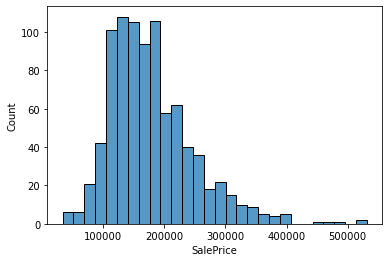

In [68]:
X = df[features_final]
df['SalePrice'] =gs.predict(X)
sns.histplot(df['SalePrice'])

### output with correct format

In [69]:
df_submission = df.loc[:,['Id','SalePrice']]

In [70]:
df_submission.head(100)

,Id,SalePrice
0,2658,157280.647802
1,2718,176303.071478
2,2414,201082.733038
3,1989,108350.234364
4,625,186278.203034
...,...,...
95,1991,149101.452070
96,1411,164580.754726
97,1721,242989.781194
98,1144,182605.210014


In [71]:
df_submission.to_csv("../datasets/submission.csv",index=False)